In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
import pandas as pd
from lmfit import Model
from lmfit.models import LinearModel

import sys
sys.path.append(os.path.join(Path(os.getcwd()).parents[0], "functions"))
import warnings
warnings.filterwarnings('ignore')
import helper_functions as hfn
import plotting_functions as plotfn
import inputfraction_functions as fracfn

In [2]:
 # load models from lmfit package
from lmfit import Model
from lmfit.models import LinearModel

In [3]:
model_lm = LinearModel()

In [4]:
path = Path(os.getcwd()).parents[0]
alldatapath = os.path.join(path,'data')
datapath = os.path.join(alldatapath, 'clean')
paramspath = os.path.join(path, 'compare_linfit_params')

In [5]:
figpath = os.path.join(path, 'figures')
hfn.dir_check(figpath)
    
figs21path = os.path.join(figpath, 'FigS5')
hfn.dir_check(figs21path)

figs21panelpaths = os.path.join(figs21path, 'panels')
hfn.dir_check(figs21panelpaths)

In [6]:
areas_sel = ['VISp','VISpm','VISl', 'VISam', 'VISal', 'RSPagl', 'RSPd', 'RSPv', 'AM', 'LD', 'LP', 'LGd', 'ORB', 'ACA', 'MOs', 'CLA', 'PTLp', 'TEa', 'AUD',]

In [7]:
areas, areas_with_pre, df_raw, df_all, df_v1, df_pm = hfn.import_main_dataset(datapath)

In [8]:
df_log_all = hfn.make_log_df_full(df_all, areas)

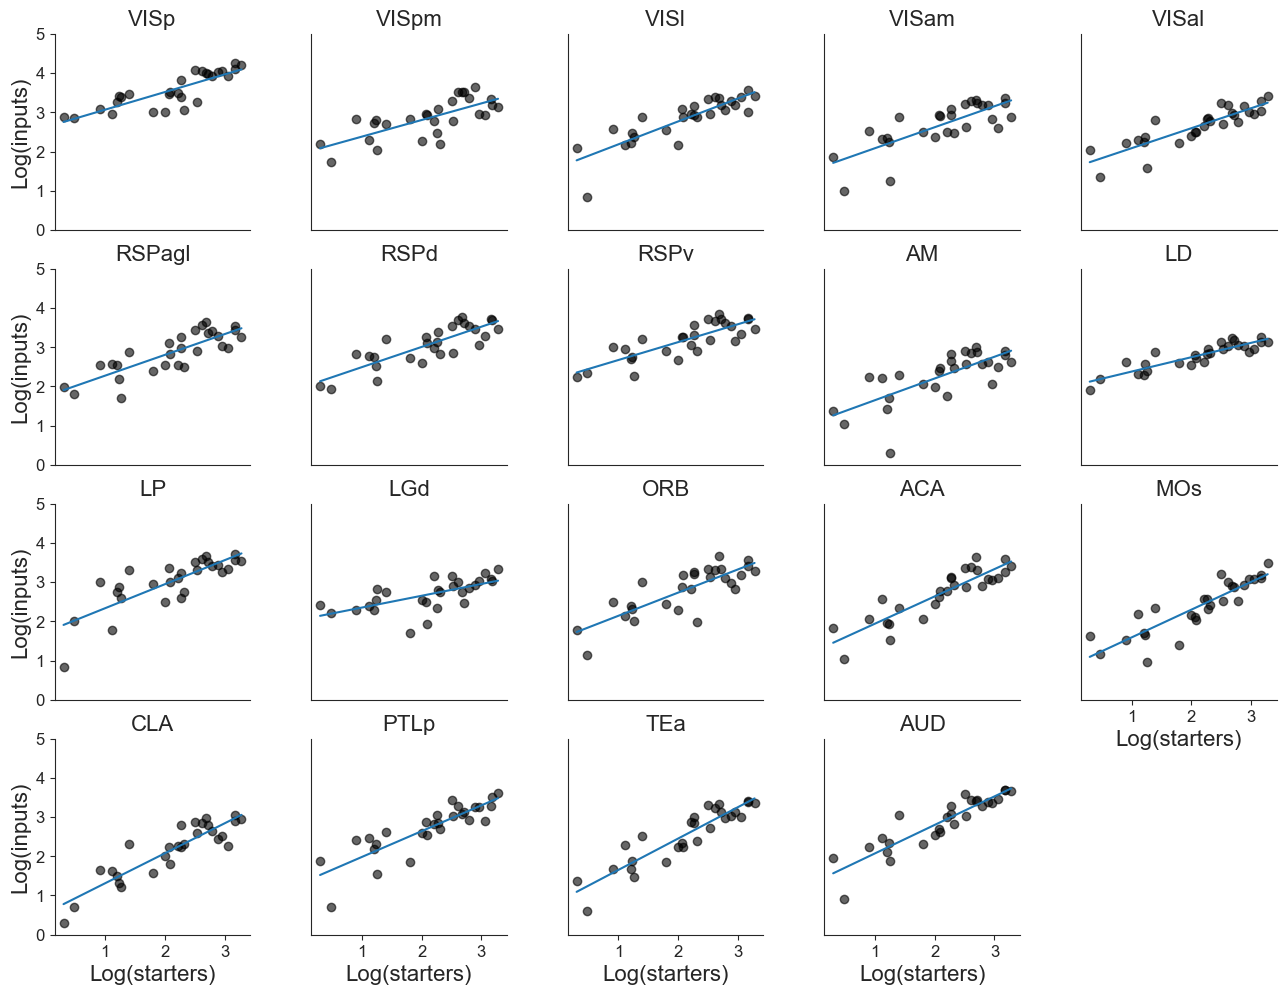

In [9]:
f1 = plt.figure(figsize = (16, 30))

gs = f1.add_gridspec(10,5)

ax = {}

for i, area in enumerate(areas_sel):
    thispars = model_lm.guess(df_log_all[area].values, x = df_log_all['starter'].values)
    thisres = model_lm.fit(df_log_all[area].values, thispars, x = df_log_all['starter'].values)

    if i%5 == 0 :
        ax[i] = f1.add_subplot(gs[int(i/5):int(i/5)+1, 0:1])
        ax[i].set_ylabel('Log(inputs)', fontsize = 16)
    elif i%5 == 1:
        ax[i] = f1.add_subplot(gs[int(i/5):int(i/5)+1, 1:2])
        ax[i].yaxis.set_visible(False)
    elif i%5 == 2:
        ax[i] = f1.add_subplot(gs[int(i/5):int(i/5)+1, 2:3])
        ax[i].yaxis.set_visible(False)
    elif i%5 == 3:
        ax[i] = f1.add_subplot(gs[int(i/5):int(i/5)+1, 3:4])
        ax[i].yaxis.set_visible(False)
    elif i%5 == 4:
        ax[i] = f1.add_subplot(gs[int(i/5):int(i/5)+1, 4:5])
        ax[i].yaxis.set_visible(False)
        
    ax[i].plot(df_log_all['starter'], df_log_all[area], 'o', c = 'k', alpha = 0.6)
    ax[i].plot(df_log_all['starter'], thisres.best_fit)
    ax[i].set_title(area, fontsize = 16)
    ax[i].set_ylim(0, 5)

    if area == 'AUD' or area =='TEa' or area == 'PTLp' or area == 'CLA' or area == 'MOs':
        ax[i].set_xlabel('Log(starters)', fontsize = 16)
    else:
        ax[i].xaxis.set_visible(False)
        
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].set_aspect(1.0/ax[i].get_data_ratio(), adjustable='box')
    ax[i].set_rasterized(True)
    ax[i].tick_params(labelsize=12)
plt.savefig(os.path.join(figs21panelpaths, 'figS5.png'), bbox_inches = 'tight', dpi = 200)
plt.savefig(os.path.join(figs21panelpaths, 'figS5.eps'), bbox_inches = 'tight', format = 'eps',  dpi = 200)